In [1]:
import sys
from pathlib import Path

# Add project root to Python path
project_root = Path().resolve().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

import grain
import pickle
import jax.numpy as jnp
import torch
from models.utils import jax_to_torch, torch_to_jax

In [2]:
file_path = "../image_net.array_record"

array_record_data_source = (grain.sources.ArrayRecordDataSource(
    file_path
))
print(f"Number of records: {len(array_record_data_source)}")

first_element = pickle.loads(array_record_data_source[0])
latent = jnp.array(first_element['latent']).view(jnp.bfloat16)
label = jnp.array(first_element['label'])

print(latent.shape)
print(label)

Number of records: 1281167
(16, 32, 32)
726


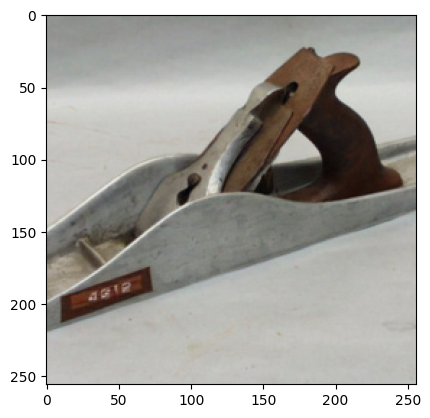

In [5]:
from diffusers.models import AutoencoderKL

vae: AutoencoderKL = AutoencoderKL.from_pretrained(
    "stabilityai/stable-diffusion-3-medium-diffusers",
    subfolder="vae",
    torch_dtype=torch.bfloat16,
).to(device="cuda")

latent_torch = jax_to_torch(latent).unsqueeze(0)
img = vae.decode(latent_torch)[0]

import matplotlib.pyplot as plt

img = img[0].permute(1,2,0).detach().float().cpu().clip(0,1).numpy()
plt.imshow(img)